## Importing the libraries 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
import geopandas as gpd
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from sklearn.feature_extraction.text import CountVectorizer

## Importing the data

In [2]:
raw_df = pd.read_csv('DC_2020Sep21/listings.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 7350 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20200921033217,2020-09-22,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,67%,100%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86314,-76.98836,Private room in house,Private room,1,NaN,1 private bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Bed line...",$55.00,2,365,2,2,365,365,2.0,365.0,NaN,t,30,60,90,365,2020-09-22,72,1,0,2010-11-01,2020-04-01,92.0,9.0,9.0,10.0,10.0,8.0,9.0,NaN,f,2,0,2,0,0.60
1,3943,https://www.airbnb.com/rooms/3943,20200921033217,2020-09-21,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,Our rowhouse is centrally located in the heart...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States","We are a married couple in our 30's, living an...",within a few hours,100%,33%,f,https://a0.muscache.com/im/users/5059/profile_...,https://a0.muscache.com/im/users/5059/profile_...,Eckington,0,0,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91066,-77.00438,Private room in townhouse,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Bed line...",$80.00,27,1125,27,27,1125,1125,27.0,1125.0,NaN,t,28,58,88,101,2020-09-21,429,0,0,2009-05-10,2018-08-07,96.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,0,2,0,3.10
2,4197,https://www.airbnb.com/rooms/4197,20200921033217,2020-09-21,Bedroom in DC 2 blocks to Metro,This is the middle bedroom upstairs in a resto...,"Our area, the Eastern Market neighborhood of C...",https://a0.muscache.com/pictures/5e2bd169-b14f...,5061,https://www.airbnb.com/users/show/5061,Sandra,2008-12-12,"Washington D.C., District of Columbia, United ...",I’m a California native who came to work for t...,NaN,NaN,96%,t,https://a0.muscache.com/im/pictures/user/ddd27...,https://a0.muscache.com/im/pictures/user/ddd27...,Capitol Hill,2,2,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Capitol Hill, Lincoln Park",NaN,38.88791,-76.99668,Private room in house,Privat

In [3]:
raw_df_2019 = pd.read_csv('DC_2019Sep22/listings.csv')
print(f"The dataset contains {len(raw_df_2019)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df_2019.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df_2019.head(3)

The dataset contains 9189 Airbnb listings


/Users/yingli/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3344,https://www.airbnb.com/rooms/3344,20190922191721,2019-09-22,"White House/Center City, 1 roommate",This listing is for one roommate in a 2BR/2BA ...,"You have found The One, but be sure to message...",This listing is for one roommate in a 2BR/2BA ...,none,This is the hottest neighborhood in D.C. at th...,The condo is bright and clean. All friends and...,The Circulator bus to Georgetown and Union sta...,"Gym on main floor inside condo building, small...",I am out of state on my job four days out of e...,Please always message me before you book the s...,NaN,NaN,https://a0.muscache.com/im/pictures/18033/45c9...,NaN,4957,https://www.airbnb.com/users/show/4957,A.J.,2008-12-10,"Washington, District of Columbia, United States","Cordial, considerate host who keeps out of the...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/17188...,https://a0.muscache.com/im/pictures/user/17188...,Downtown/Penn Quarter,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Washington, DC, United States",Downtown/Penn Quarter,"Downtown, Chinatown, Penn Quarters, Mount Vern...",NaN,Washington,DC,20005,D.C.,"Washington, DC",US,United States,38.90126,-77.02857,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$58.00,$480.00,"$1,495.00","$1,500.00",$0.00,1,$25.00,90,720,90,90,720,720,90.0,720.0,5 weeks ago,t,23,53,83,358,2019-09-22,11,0,2009-05-09,2016-08-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""DISTRICT OF COLUMBIA"","" WASHINGTON""}",t,f,moderate,f,f,2,1,1,0,0.09
1,3362,https://www.airbnb.com/rooms/3362,20190922191721,2019-09-22,"Convention Center Rowhouse & In Law: 2 Units, 4BR",An architect-designed rowhouse featuring a lar...,This listing features our 19th century Victori...,An architect-designed rowhouse featuring a lar...,none,NaN,NaN,The best part of living in Shaw is that you're...,Guests will have access to the entire three-le...,"We look for responsible, independent guests wh...",- Be respectful of our neighbors (no loud musi...,NaN,NaN,https://a0.muscache.com/im/pictures/18666/06da...,NaN,2798,https://www.airbnb.com/users/show/2798,Ayeh,2008-09-07,"Washington, District of Columbia, United States",I love the District and sharing all the local ...,within a

In [4]:
raw_df.name

0                                         Vita's Hideaway
1                        Historic Rowhouse Near Monuments
2                         Bedroom in DC 2 blocks to Metro
3                                          DC, Near Metro
4                                Cozy apt in Adams Morgan
                              ...                        
7345                            DC Hidden In Plain "Site"
7346    DC 3 BR w/ screen porch 3 blck to metro w/ par...
7347    Charming Penthouse Apt w/ Rooftop Terrace in L...
7348                  Adams Morgan/Nat'l Zoo 1 BR Apt #32
7349      Beautiful large one-bedroom w/ washer and dryer
Name: name, Length: 7350, dtype: object

In [5]:
raw_df_sum = pd.read_csv('DC_2020Sep21/listings_summary.csv')
#print(f"The dataset contains {len(raw_df_sum)} Airbnb listings")
#pd.set_option('display.max_columns', len(raw_df_sum.columns)) # To view all columns
#pd.set_option('display.max_rows', 100)
#raw_df.head(3)

In [6]:
raw_df_sum.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.86314,-76.98836,Private room,55,2,72,2020-04-01,0.60,2,365
1,3943,Historic Rowhouse Near Monuments,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91066,-77.00438,Private room,80,27,429,2018-08-07,3.10,2,101
2,4197,Bedroom in DC 2 blocks to Metro,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.88791,-76.99668,Private room,76,28,45,2020-03-14,0.33,2,324
3,4967,"DC, Near Metro",7086,Seveer,NaN,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91263,-76.99221,Private room,99,2,31,2016-09-22,0.26,3,83
4,5589,Cozy apt in Adams Morgan,6527,Ami,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.91933,-77.04124,Entire home/apt,76,7,95,2020-03-05,0.71,2,109


## Cleaning and preprocessing 

#### Dropping initial columns

NLP will not be used in the creation of an initial model (although they could be used to augment the model later, e.g. through sentiment analysis). Therefore, free text columns will be dropped for now, as will other columns which are not useful for predicting price (e.g. url, host name and other host-related features that are unrelated to the property).



In [7]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

In [8]:
df.isna().sum()

id                                                 0
host_since                                         0
host_response_time                              2554
host_response_rate                              2554
host_acceptance_rate                            1866
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                   2472
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    7350
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                     

Base on the null entries, other columns can be dropped because they contain a majority of null entries.

In [9]:
df.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license'], axis=1, inplace=True)

df.set_index('id', inplace=True) # The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one


host_listings_count and host_total_listings_count are the same. Therefore one of these columns can be dropped.

In [10]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

0


,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [11]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

There are multiple columns for property location, including an attempt by the site that originally scraped the data to clean up the neighbourhood locations. Some of these columns can be dropped. Because all of the listings are in DC, columns relating to city and country can be dropped. 
* Latitude and longitude will be saved in a dataframe for later use (see modelling section below).
* One columns for area will be kept - 'neighboorhood_cleansed', ''neighboorhood' will be dropped 

In [12]:
lat_long = df[['latitude', 'longitude']]

In [13]:
df.drop(['latitude', 'longitude',  'neighbourhood'], axis=1, inplace=True)

There are multiple columns for minimum and maximum night stays, but the two main ones will be used as there are few differences between e.g. minimum_nights and minimum_minimum_nights. The latter presumably refers to the fact that min/max night stays can vary over the year. The default (i.e. most frequently applied) min/max night stay values will be used instead.

In [14]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

380

In [15]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including:

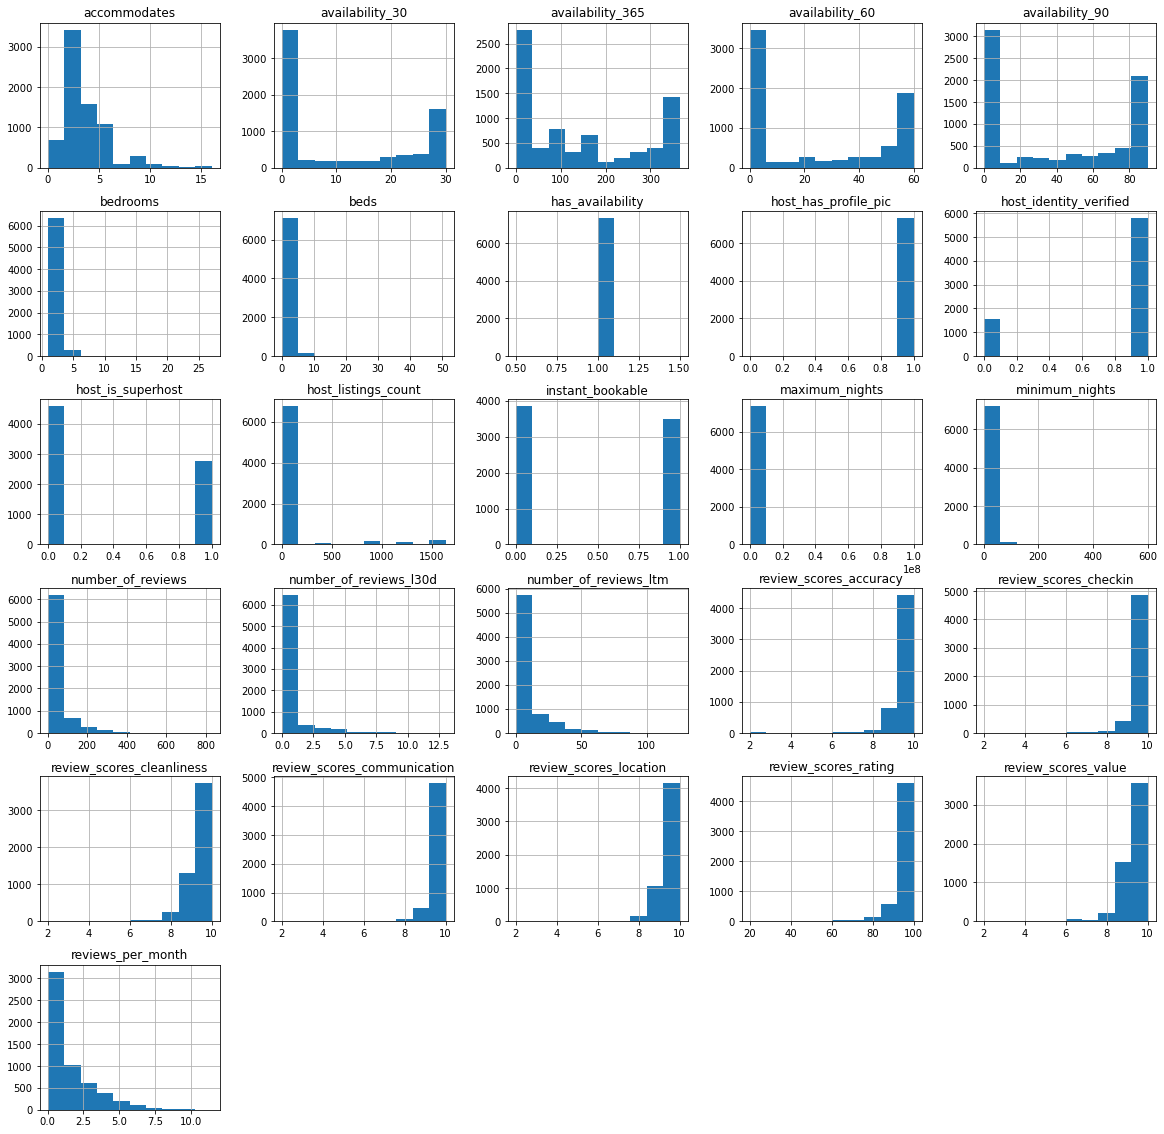

In [16]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

From the above, it can be seen that several columns only contain one category and can be dropped:

In [17]:
df.drop(['has_availability', 'host_has_profile_pic'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7350 entries, 3686 to 45517735
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   7350 non-null   object 
 1   host_response_time           4796 non-null   object 
 2   host_response_rate           4796 non-null   object 
 3   host_acceptance_rate         5484 non-null   object 
 4   host_is_superhost            7350 non-null   int64  
 5   host_listings_count          7350 non-null   int64  
 6   host_identity_verified       7350 non-null   int64  
 7   neighbourhood_cleansed       7350 non-null   object 
 8   property_type                7350 non-null   object 
 9   room_type                    7350 non-null   object 
 10  accommodates                 7350 non-null   int64  
 11  bathrooms_text               7343 non-null   object 
 12  bedrooms                     6619 non-null   float64
 13  beds       

### Description of each column:
* host_since - date that the host first joined Airbnb
* host_response_time - average amount of time the host takes to reply to messages
* host_response_rate - proportion of messages that the host replies to
* host_acceptance_rate - proportion of the booking requests accepted 
* host_is_superhost - whether or not the host is a superhost, which is a mark of quality for the top-rated and most * * host_listings_count - how many listings the host has in total
* host_identity_verified - whether or not the host has been verified with id
* neighbourhood_cleansed - the London borough the property is in
* property_type - type of property, e.g. house or flat
* room_type - type of listing, e.g. entire home, private room or shared room
* accommodates - how many people the property accommodates
# * bathrooms_text - number of bathrooms  (text)
* bedrooms - number of bedrooms
* beds - number of beds
* bed_type - type of bed, e.g. real bed or sofa-bed
* amenities - list of amenities
* price - nightly advertised price (the target variable)
* minimum_nights - the minimum length of stay
* maximum_nights - the maximum length of stay
* calendar_updated - when the host last updated the calendar
* availability_30 - how many nights are available to be booked in the next 30 days
* availability_60 - how many nights are available to be booked in the next 60 days
* availability_90 - how many nights are available to be booked in the next 90 days
* availability_365 - how many nights are available to be booked in the next 365 days
* number_of_reviews - the number of reviews left for the property
* number_of_reviews_ltm - the number of reviews left for the property in the last twelve months
* first_review - the date of the first review
* last_review - the date of the most recent review
* review_scores_rating - guests can score properties overall from 1 to 5 stars
* review_scores_accuracy - guests can score the accuracy of a property's description from 1 to 5 stars
* review_scores_cleanliness - guests can score a property's cleanliness from 1 to 5 stars
* review_scores_checkin - guests can score their check-in from 1 to 5 stars
* review_scores_communication - guests can score a host's communication from 1 to 5 stars
* review_scores_location - guests can score a property's location from 1 to 5 stars
* review_scores_value - guests can score a booking's value for money from 1 to 5 stars
* instant_bookable - whether or not the property can be instant booked (i.e. booked straight away, without having to * * reviews_per_month - calculated field of the average number of reviews left by guest each month

### Cleaning individual columns

### host_since

This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (9 April 2019). The original column will be left in initially for EDA, and dropped later.

In [19]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2020, 9, 21) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1858.0
Median days as host: 1828.0


### host_response_time

About a third of rows don't have a value for host_response_time, and the majority of these have also not yet been reviewed. Therefore this section of the dataset consists primarily of properties which have not yet had a completed stay (most likely properties which have not yet had a booking, although may also include properties that have a booking currently occuring). Although this is a considerable proportion of the dataset, these listings will be retained in the data because they are still legitimate properties with advertised prices, and are still part of the comparative market when considering the price for which to advertise your Airbnb listing. However, if the dataset being used had the actual average price paid as its target, it would be necessary to drop these rows because they would not have a value, as they have not yet been booked.

It is worth noting, however, that this group of listings probably also contains a large number of 'inactive' listings. These are properties which have been speculatively listed on Airbnb but either have their calendars closed (so no stays can be booked), or have prices which are notably higher than other properties in their area. The latter occurs in some cases when people who regularly live in a property put their property on Airbnb at a high price just to see if anyone is willing to book at that price (some Airbnb listings are indeed booked at very high prices). Then if their property is booked, they will decamp to a cheaper hotel for those dates, and pocket the difference in price.

Because host_response_time is unknown for so many listings, it will be retained as its own category, 'unknown'.

In [20]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

Null values: 2554
Proportion: 34.7%


In [21]:
# Number of rows without a value for host_response_time which have also not yet had a review
len(df[df[['host_response_time', 'first_review']].isnull().all(axis=1)])

849

In [22]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.394830
unknown               0.347483
within a few hours    0.144354
within a day          0.089932
a few days or more    0.023401
Name: host_response_time, dtype: float64

In [23]:
df.host_response_time.value_counts(normalize=True)

within an hour        0.394830
unknown               0.347483
within a few hours    0.144354
within a day          0.089932
a few days or more    0.023401
Name: host_response_time, dtype: float64

### host_response_rate

A similar story is true for host_response_rate, with about a third of values being null. This will also be kept as its own category, after grouping other values into meaningful groups (i.e. transforming this into a categorical feature, rather than a numerical one). Because about 70% of hosts respond 100% of the time, this will be kept as its own category, and other values will be grouped into bins.

In [24]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 2554
Proportion: 34.7%


In [25]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 93.0
Median host response rate: 100.0
Proportion of 100% host response rates: 68.3%


In [26]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       3276
unknown    2554
90-99%      742
50-89%      563
0-49%       215
Name: host_response_rate, dtype: int64

### host_acceptance_rate

In [27]:
print("Null values:", df.host_acceptance_rate.isna().sum())
print(f"Proportion: {round((df.host_acceptance_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 1866
Proportion: 25.4%


In [28]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_acceptance_rate = df.host_acceptance_rate.str[:-1].astype('float64')

print("Mean host acceptance rate:", round(df['host_acceptance_rate'].mean(),0))
print("Median host acceptance rate:", df['host_acceptance_rate'].median())
print(f"Proportion of 100% host acceptance rates: {round(((df.host_acceptance_rate == 100.0).sum()/df.host_acceptance_rate.count())*100,1)}%")

Mean host acceptance rate: 87.0
Median host acceptance rate: 98.0
Proportion of 100% host acceptance rates: 33.4%


In [29]:
# Bin into four categories
df.host_acceptance_rate = pd.cut(df.host_acceptance_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_acceptance_rate = df.host_acceptance_rate.astype('str')

# Replace nulls with 'unknown'
df.host_acceptance_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_acceptance_rate.value_counts()

90-99%     1913
unknown    1866
100%       1834
50-89%     1317
0-49%       420
Name: host_acceptance_rate, dtype: int64

### host_is_superhost

five different host-related features have the same number of nan values. 

In [30]:
# Number of rows without a value for multiple host-related columns
len(df[df[['host_since', 'host_is_superhost', 'host_listings_count', 'host_identity_verified']].isnull().all(axis=1)])

0

### property_type

Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.

In [31]:
df.property_type.value_counts()

Entire apartment                     2588
Private room in house                 724
Entire house                          711
Entire townhouse                      554
Private room in townhouse             501
Entire condominium                    442
Entire serviced apartment             406
Entire guest suite                    404
Private room in apartment             360
Private room in condominium           146
Shared room in apartment               92
Room in boutique hotel                 72
Entire loft                            41
Entire guesthouse                      35
Private room in guest suite            29
Shared room in townhouse               27
Private room in bed and breakfast      25
Shared room in house                   22
Shared room in hostel                  16
Room in hotel                          16
Entire place                           15
Room in serviced apartment             15
Shared room in condominium             12
Private room in loft              

In [32]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Entire townhouse': 'House',
    'Entire apartment': 'Apartment',
    'Entire serviced apartment': 'Apartment',
    'Entire loft': 'Apartment',
    'Entire guesthouse': 'Apartment',
    'Entire guest suite': 'Apartment',
    'Entire condominium': 'Apartment',
    'Entire house': 'House',
    'Entire place': 'House',
    'Entire Villa': 'House',
    'Tiny house': 'House',
    'Entire bungalow': 'House',
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

### bedrooms and beds

Missing values will be replaced with the median (to avoid strange fractions).

In [33]:
for col in ['bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

### bathrooms

Bathrooms are text format,and is very messy

In [34]:
df.bathrooms_text.value_counts()

1 bath               3912
1 shared bath         732
2 baths               671
1 private bath        589
1.5 baths             423
2.5 baths             369
1.5 shared baths      185
3.5 baths             117
3 baths                97
2 shared baths         97
2.5 shared baths       40
4 baths                27
4.5 baths              21
3 shared baths         13
4.5 shared baths        9
5.5 baths               6
0 shared baths          6
3.5 shared baths        4
5 baths                 4
Half-bath               3
0 baths                 3
Shared half-bath        2
5.5 shared baths        2
8 shared baths          2
6.5 baths               2
50 shared baths         1
11 shared baths         1
10 shared baths         1
Private half-bath       1
10.5 baths              1
6 baths                 1
6 shared baths          1
Name: bathrooms_text, dtype: int64

In [35]:
df.bathrooms_text.isnull().sum()

7

In [36]:
df.loc[:, "bathrooms_text_1"] = df["bathrooms_text"].astype(str).str.replace("Half","0.5").str.replace("half","0.5")
df.loc[:, "bathrooms_text_1"] = df["bathrooms_text_1"].astype(str).str.replace("Private 0.5-bath","0.5 private bath")
df.loc[:, "bathrooms_text_1"] = df["bathrooms_text_1"].astype(str).str.replace("Shared 0.5-bath","0.5 shared bath")
df.loc[:, "bathrooms_text_1"] = df["bathrooms_text_1"].astype(str).str.replace("0.5-bath","0.5 bath")
df.loc[:, "bathrooms_text_1"] = df["bathrooms_text_1"].astype(str).str.replace("-"," ")
df.loc[:, "bathrooms_text_1"] = df["bathrooms_text_1"].astype(str).str.replace("nan","1")

In [37]:
df.bathrooms_text_1.value_counts()

1 bath              3912
1 shared bath        732
2 baths              671
1 private bath       589
1.5 baths            423
2.5 baths            369
1.5 shared baths     185
3.5 baths            117
3 baths               97
2 shared baths        97
2.5 shared baths      40
4 baths               27
4.5 baths             21
3 shared baths        13
4.5 shared baths       9
1                      7
0 shared baths         6
5.5 baths              6
3.5 shared baths       4
5 baths                4
0.5 bath               3
0 baths                3
0.5 shared bath        2
5.5 shared baths       2
8 shared baths         2
6.5 baths              2
50 shared baths        1
10 shared baths        1
11 shared baths        1
0.5 private bath       1
10.5 baths             1
6 baths                1
6 shared baths         1
Name: bathrooms_text_1, dtype: int64

In [38]:
df.loc[:, "bathrooms"] = pd.to_numeric(df.bathrooms_text_1.str.split(" ", n = 0, expand = True)[0])

In [39]:
df.bathrooms.value_counts()

1.0     5240
2.0      768
1.5      608
2.5      409
3.5      121
3.0      110
4.5       30
4.0       27
0.0        9
5.5        8
0.5        6
5.0        4
8.0        2
6.0        2
6.5        2
10.5       1
10.0       1
11.0       1
50.0       1
Name: bathrooms, dtype: int64

In [40]:
df.drop(['bathrooms_text', 'bathrooms_text_1'], axis=1, inplace=True)

### Price

Price will be converted to an integer - currently it is a string because there is a currency sign.

In [41]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

### first_review and last_review

About a quarter of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information - reviews are very important in people's decisions to book, and therefore price.

This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model work able to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an 'unknown' category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

In [42]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 24.5%
Null values in 'review_scores_rating': 25.9%


In [43]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2020, 9, 21) - df.first_review).astype('timedelta64[D]')

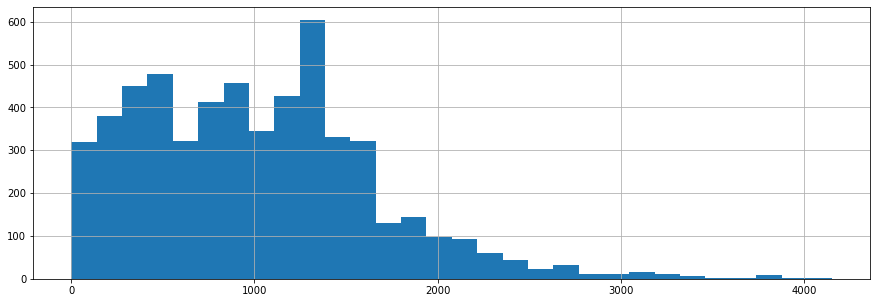

In [44]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [45]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """   
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col] = df[col].str.replace("nan",na_label)
#    df[col].fillna(na_label, inplace=True)

In [46]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

The same process will be followed for last_review:

In [47]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2020, 9, 21) - df.last_review).astype('timedelta64[D]')

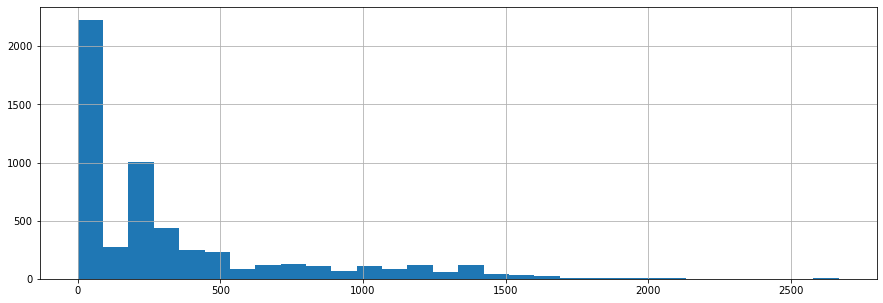

In [48]:
# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [49]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [50]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

### review ratings columns

As above, listings without reviews will be kept and replaced with 'unknown'. Other ratings will be grouped into bins. The histograms below were produced in order to decide on useful bins. The majority of ratings are 9 or 10 out of 10, as also seen in the value count below. Therefore for these columns, 9/10 and 10/10 will be kept as separate groups, and 1-8/10 will be binned together (as this is, by Airbnb standards, a 'low' rating).

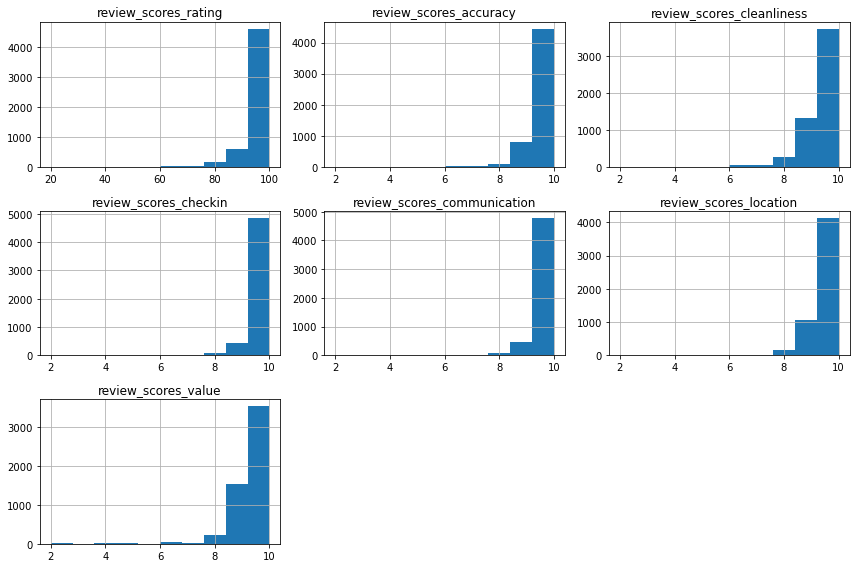

In [51]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [52]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [53]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [54]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

### number_of_reviews_ltm and reviews_per_month

These will be highly correlated with number_of_reviews and so will be dropped.

In [55]:
df.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

## EDA

### Time series

Question: how long have hosts been listing properties on Airbnb in London?

- The number of new hosts started to increase since 2011.

- There is a big peak in the number of hosts joining Airbnb in 2016 and 2017.

- There is a big decreas in the beginning of 2020, due to COVID19. 

- The decreaes in 2019 could be a response to the geovernment legislation. The new law is designed to impose some of the tightest limits in the nation on short-term rentals. It prevents D.C. property owners from renting out second homes on a short-term basis, and it bars the renting out of spare rooms or the basement in a host’s primary residence for more than 90 days per year when the host is away. (<a href="https://www.washingtonpost.com/local/dc-politics/frustrated-airbnb-hosts-wait-for-dc-to-explain-new-regulations/2019/10/31/88293190-fa83-11e9-8190-6be4deb56e01_story.html">news link</a>) 

- A high level of seasonality is evident, with notable peaks in the summer break and winter holidays.

In [56]:
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(df.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(df.host_since).strftime('%d %B %Y')}.")

Of the Airbnb hosts that are still listing on the site, the first joined on 27 September 2008, and the most recent joined on 17 September 2020.


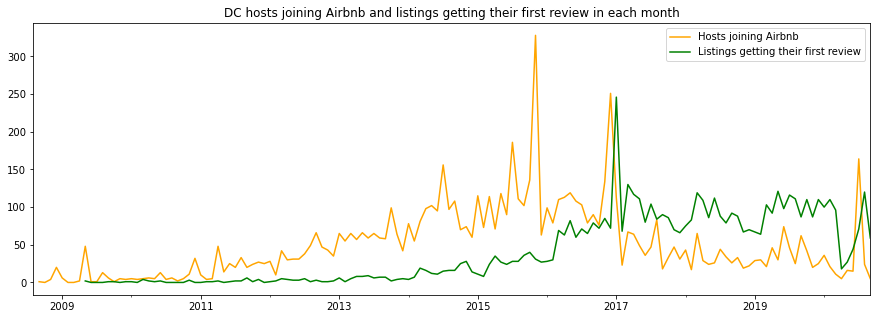

In [57]:
plt.figure(figsize=(15,5))
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('DC hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2008-08-01', '2020-9-21') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [58]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [59]:
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

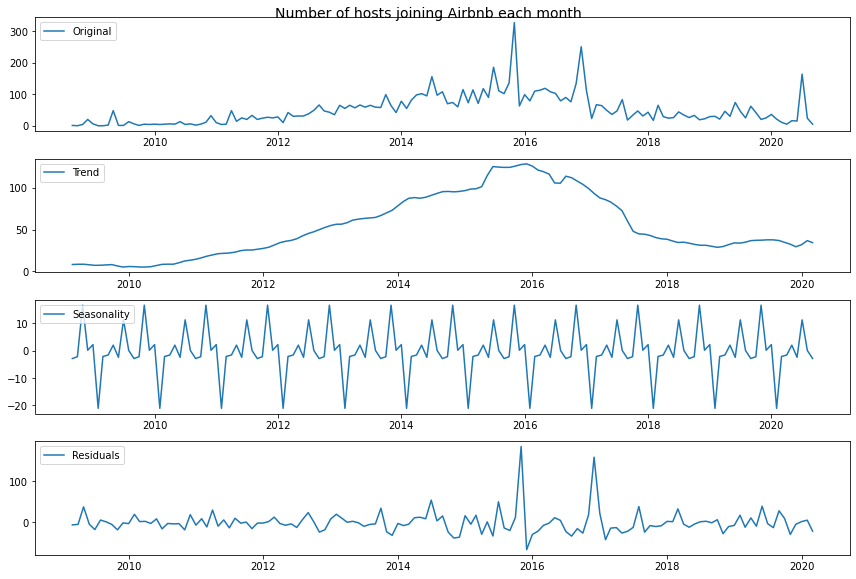

In [60]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

Question: are the different patterns in the growth in the number of hosts and the number of listings due to hosts increasingly owning multiple properties?

Answer: there are a number of professional Airbnb management companies which host a large number of listings under a single host profile, particularly from 2013 onwards. The largest manages 1636 listings and is xxxx company based in xxx.

However, there is no consistent upwards trend in the average number of properties managed by each host.

/Users/yingli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yingli/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/yingli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/yingli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/yingli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


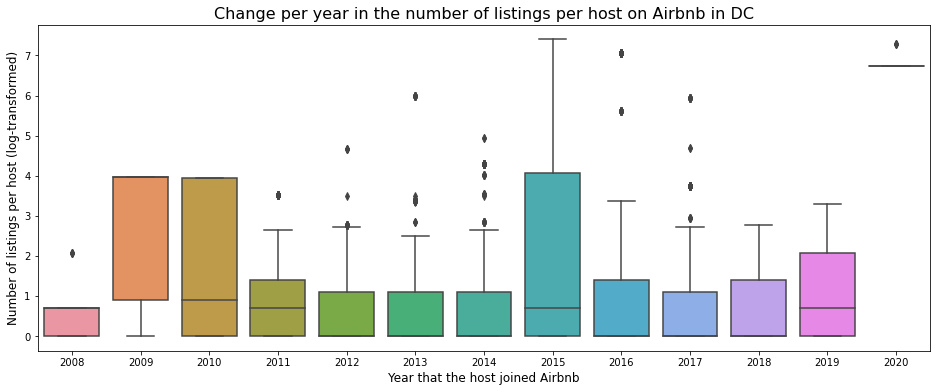

In [61]:
plt.figure(figsize=(16,6))
sns.boxplot(df.host_since.dt.year, np.log(df.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in DC', fontsize=16)
plt.show()

In [62]:
df.host_listings_count.max()

1636

There are a number of professional Airbnb management companies which host a large number of listings under a single host profile, 

In [63]:
print("Average number of listings per host per year on Airbnb in DC:")
print(round(df.set_index('host_since').host_listings_count.resample('YS').mean(),2))

Average number of listings per host per year on Airbnb in DC:
host_since
2008-01-01      2.76
2009-01-01     30.39
2010-01-01     16.98
2011-01-01      6.01
2012-01-01      3.96
2013-01-01     11.00
2014-01-01      5.33
2015-01-01    271.24
2016-01-01    119.50
2017-01-01     14.42
2018-01-01      3.13
2019-01-01      5.60
2020-01-01    445.65
Freq: AS-JAN, Name: host_listings_count, dtype: float64


## What happened in 2020 data? check the superhost joined in 2020-07-29, who has 1000 of listing around the US, not only in DC

In [64]:
# List of the largest host_listings_count and the year the host joined Airbnb
df.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

,host_since,host_listings_count
id,,
30503216,2017-08-16,108
38062300,2014-05-31,141
44262387,2016-09-16,277
19292454,2017-03-24,383
22653398,2013-10-14,404
18668105,2015-03-30,464
45439799,2020-07-29,852
37700932,2016-12-16,1158
45255939,2020-07-29,1477


Question: how have prices changed over time?

Answer: the average price per night for Airbnb listings in DC has increased slightly and peaks in 2015 and 2016, and decreased a little bit since then.

/Users/yingli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


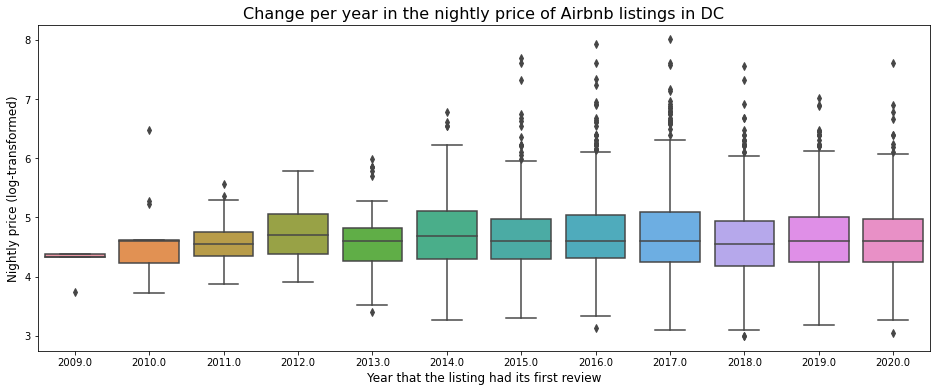

In [65]:
plt.figure(figsize=(16,6))
sns.boxplot(df.first_review.dt.year, np.log(df.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in DC', fontsize=16)
plt.show()

In [66]:
print("Mean nightly price of listings in each year on Airbnb in DC:")
print(round(df.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in DC:
first_review
2009-01-01     70.80
2010-01-01    138.54
2011-01-01    108.50
2012-01-01    134.00
2013-01-01    117.87
2014-01-01    148.34
2015-01-01    149.79
2016-01-01    150.47
2017-01-01    146.17
2018-01-01    122.59
2019-01-01    126.49
2020-01-01    126.67
Name: price, dtype: float64


## I haven't dropped yet, in case I need to use them 

In [67]:
# Dropping host_since and first_review as they are no longer needed
#df.drop(['host_since', 'first_review'], axis=1, inplace=True)

## Numerical features

In [68]:
df.describe()

,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_l30d,instant_bookable,host_days_active,bathrooms
count,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7.350000e+03,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000
mean,0.377143,100.404626,0.788980,3.559864,1.455646,1.858367,176.833197,9.223401,1.424328e+04,10.754830,24.448299,39.768163,140.210204,39.059048,0.510340,0.477007,1857.814286,1.346463
std,0.484704,341.231480,0.408061,2.292502,0.907404,1.622218,313.737740,25.572240,1.166417e+06,12.473034,25.667547,38.558071,140.364185,69.600300,1.249341,0.499505,857.189638,0.894639
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,72.000000,1.000000,3.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1375.000000,1.000000
50%,0.000000,1.500000,1.000000,3.000000,1.000000,1.000000,103.000000,2.000000,1.000000e+03,1.000000,14.000000,32.000000,90.000000,8.000000,0.000000,0.000000,1828.000000,1.000000
75%,1.000000,5.000000,1.000000,4.000000,2.000000,2.000000,167.000000,4.000000,1.125000e+03,25.000000,54.000000,83.000000,284.000000,47.000000,0.000000,1.000000,2385.000000,1.500000
max,1.000000,1636.000000,1.000000,16.000000,27.000000,51.000000,10000.000000,600.000000,1.000000e+08,30.000000,60.000000,90.000000,365.000000,830.000000,13.000000,1.000000,4377.000000,50.000000


### Price

Question: what is the overall distribution of prices?

Answer: nightly advertised prices range from $\$$0 to $\$$10,000. The extreme ends of the range are due to hosts not understanding how to use Airbnb advertised prices (sometimes called 'sticker' prices) correctly. The advertised prices can be set to any arbitrary amount, and these are the prices that show when dates are not entered on the site.

A model is only as good as its data, and unfortunately this model will be predicting advertised prices rather than the prices actually paid. Nevertheless, some cleaning of the particularly unhelpful values will be done. Very small values under $\$$10 will be increased to $\$$10.

There are notable drop-offs in nightly prices at $\$$250 (first graph, orange line), $\$$1000 (second graph, orange line) and $\$$2,000 (second graph, red line). Values above $\$$2,000 will be reduced to $\$$2,000.

In [69]:
print(f"Nightly advertised prices range from ${min(df.price)} to ${max(df.price)}.")

Nightly advertised prices range from $0 to $10000.


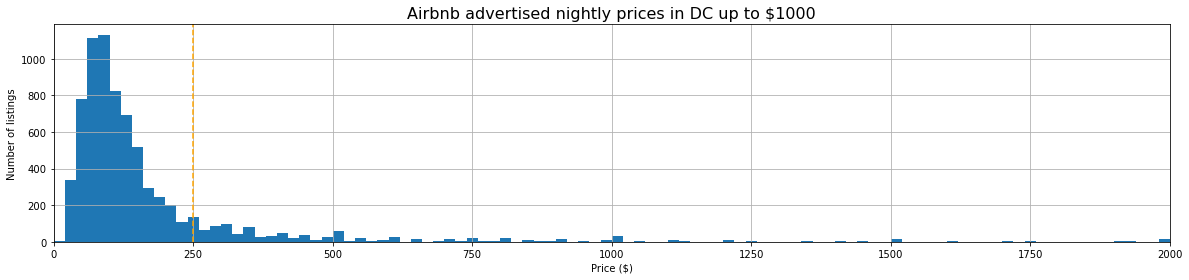

In [70]:
# Distribution of prices from $0 to $2000
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,2000))
plt.margins(x=0)
plt.axvline(250, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in DC up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

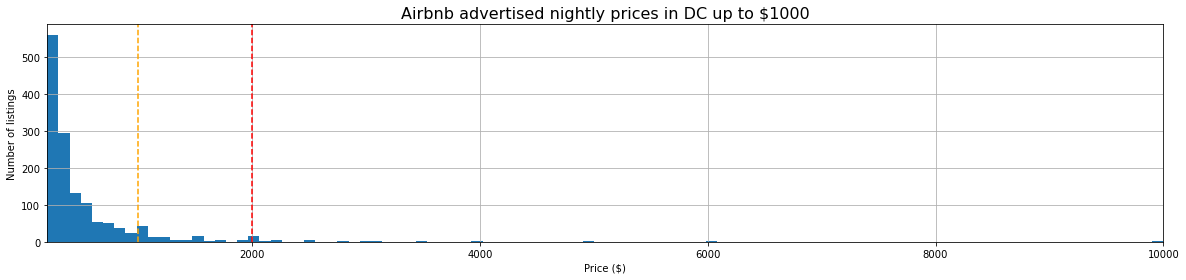

In [71]:
# Distribution of prices from $200 upwards
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(200, max(df.price)))
plt.margins(x=0)
plt.axvline(1000, color='orange', linestyle='--')
plt.axvline(2000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in DC up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

In [72]:
# Replacing values under $10 with $10
df.loc[df.price <= 10, 'price'] = 10

# Replacing values over $000 with $1000
df.loc[df.price >= 2000, 'price'] = 2000

In [73]:
print("Median number of listings per host:", int(df.host_listings_count.median()))
print("Mean number of listings per host:", int(round(df.host_listings_count.mean())))
print(f"{int(round(100*len(df[df.host_listings_count == 1])/len(df)))}% of listings are from hosts with one listing.")

Median number of listings per host: 1
Mean number of listings per host: 100
42% of listings are from hosts with one listing.


### Host listings count

Question: how many listings do hosts have on average? How many multi-listing hosts are there?

Answer: the median number of listings that the host of each listing has is 1, i.e. on average (median) each listing is hosted by a host who also manages one other listing. The mean is much higher (100 in total) due to some hosts managing large numbers of listings (as discussed above in the Time Series section). About half of listings are from hosts with one listing, and half are from multi-listing hosts.

Two difficulties in discerning how many listings hosts have on average are:

this number is only known on the level of the listing, so hosts with more listings are represented more frequently (e.g a host with 10 listings may be represented up to 10 times in the dataset)
a host's other listings may not be in DC, so some multi-listing hosts may appear multiple times in the dataset, and others may appear only once

### Number of people accommodated, bathrooms, bedrooms and beds


Question: what are the average number of people accommodated, bathrooms, bedrooms and beds in Airbnb listings in DC, and how do prices differ?

Answer: the most common property setup sleeps two people in one bed in one bedroom, with one bathroom. Unsurprisingly, properties that accommodate more people achieve noticeably higher nightly rates, with diminishing returns coming after about 10 people.

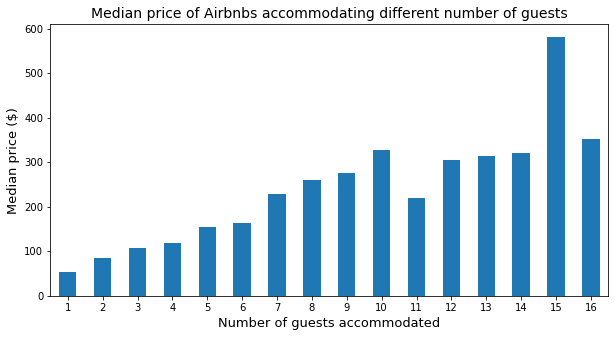

In [74]:
plt.figure(figsize=(10,5))
df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

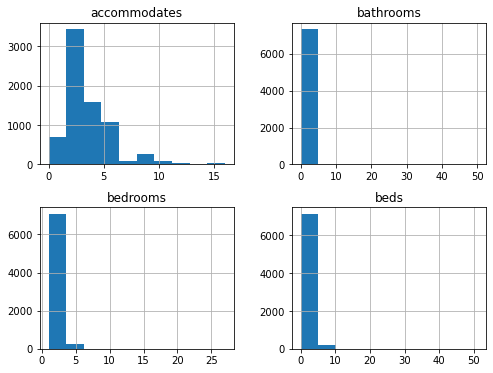

In [75]:
df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

In [76]:
df[df.bathrooms==50][['accommodates', 'bathrooms', 'bedrooms', 'beds']]

,accommodates,bathrooms,bedrooms,beds
id,,,,
30787199,16,50.0,1.0,50.0


In [77]:
df = df[df.bathrooms != 50]

one property claims to have 50 shared bathrooms, 50 beds, but only 1 bedroom), this property is dropped. <a href="https://www.airbnb.com/rooms/30787199">link url</a> 

In [78]:
df[df.beds==51][['accommodates', 'bathrooms', 'bedrooms', 'beds']]

,accommodates,bathrooms,bedrooms,beds
id,,,,
43212927,16,6.0,27.0,51.0


one property claims to have 6 shared bathrooms, 51 beds, 27 bedrooms), this property is a historical Inn, and is dropped. <a href="https://www.airbnb.com/rooms/30787199">link url</a> 

In [79]:
df = df[df.beds != 51]

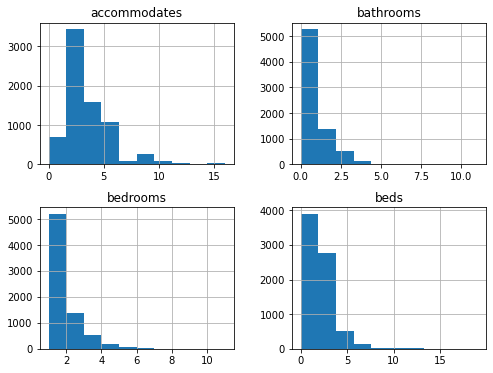

In [80]:
df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

## Categorical features

Categorical features will be explored and plotted, to gain insights and to determine whether or not they should be included in the final model.

In [81]:
df.neighbourhood_cleansed.value_counts()

Capitol Hill, Lincoln Park                                                                           683
Union Station, Stanton Park, Kingman Park                                                            679
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           622
Dupont Circle, Connecticut Avenue/K Street                                                           560
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                    556
Shaw, Logan Circle                                                                                   487
Brightwood Park, Crestwood, Petworth                                                                 400
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street                        336
Kalorama Heights, Adams Morgan, Lanier Heights                                                       305
Howard University, Le Droit Park, Cardozo/Shaw         

In [82]:
# Renaming the neighbourhood column
df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)

# Importing the London borough boundary GeoJSON file as a dataframe in geopandas
map_df = gpd.read_file('data/neighbourhoods.geojson')
map_df.head()

,neighbourhood,neighbourhood_group,geometry
0,"Congress Heights, Bellevue, Washington Highlands",None,"MULTIPOLYGON (((-77.01389 38.82865, -77.01386 ..."
1,"Douglas, Shipley Terrace",None,"MULTIPOLYGON (((-76.99291 38.85391, -76.99231 ..."
2,"Woodland/Fort Stanton, Garfield Heights, Knox ...",None,"MULTIPOLYGON (((-76.97714 38.85728, -76.97721 ..."
3,"Near Southeast, Navy Yard",None,"MULTIPOLYGON (((-76.97936 38.87756, -76.97937 ..."
4,"River Terrace, Benning, Greenway, Dupont Park",None,"MULTIPOLYGON (((-76.93760 38.88996, -76.93752 ..."


In [107]:
# Dropping the empty column
map_df.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df.groupby('neighbourhood').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df.groupby('neighbourhood').price.median().values
borough_df['review_number'] = df.groupby('neighbourhood').number_of_reviews.sum().values

# Joining the dataframes
borough_map_df = map_df.set_index('neighbourhood').join(borough_df)

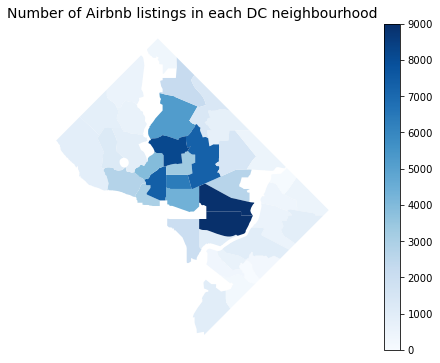

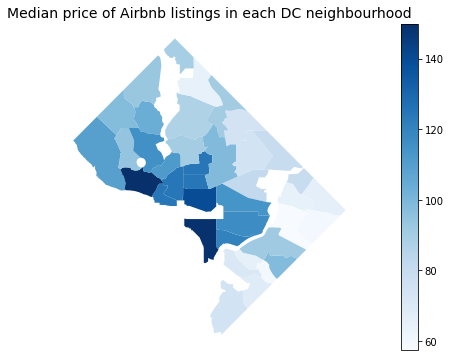

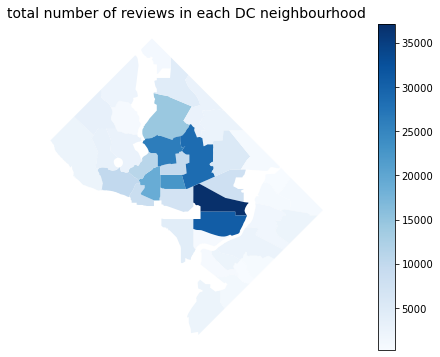

In [109]:
from descartes import PolygonPatch
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each DC neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each DC neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig3, ax3 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='review_number', cmap='Blues', ax=ax3)
ax3.axis('off')
ax3.set_title('total number of reviews in each DC neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(borough_map_df.review_number), vmax=max(borough_map_df.review_number)))
sm._A = [] # Creates an empty array for the data range
cbar = fig3.colorbar(sm)
plt.show()


### Property and room types

In [105]:
df.neighbourhood

id
3686                                       Historic Anacostia
3943        Edgewood, Bloomingdale, Truxton Circle, Eckington
4197                               Capitol Hill, Lincoln Park
4967           Ivy City, Arboretum, Trinidad, Carver Langston
5589           Kalorama Heights, Adams Morgan, Lanier Heights
                                  ...                        
45506143    Downtown, Chinatown, Penn Quarters, Mount Vern...
45511428                        Brookland, Brentwood, Langdon
45514685                                   Shaw, Logan Circle
45516412       Kalorama Heights, Adams Morgan, Lanier Heights
45517735    Edgewood, Bloomingdale, Truxton Circle, Eckington
Name: neighbourhood, Length: 7348, dtype: object

In [104]:
df

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_l30d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days_active,bathrooms,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3686,2008-11-26,within a day,50-89%,100%,0,2,1,Historic Anacostia,Other,Private room,1,1.0,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Bed line...",55,2,365,30,60,90,365,72,0,2010-11-01,80-94/100,9/10,9/10,10/10,10/10,0-8/10,9/10,0,4317.0,1.0,4+ years,2-6 months
3943,2008-12-12,within a few hours,100%,0-49%,0,0,1,"Edgewood, Bloomingdale, Truxton Circle, Eckington",Other,Private room,2,1.0,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Bed line...",80,27,1125,28,58,88,101,429,0,2009-05-10,95-100/100,10/10,10/10,10/10,10/10,9/10,9/10,0,4301.0,1.0,4+ years,1+ year
4197,2008-12-12,unknown,unknown,90-99%,1,2,1,"Capitol Hill, Lincoln Park",Other,Private room,2,1.0,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Bed line...",76,28,365,0,19,49,324,45,0,2009-05-14,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,4301.0,1.5,4+ years,6-12 months
4967,2009-01-26,within an hour,100%,0-49%,1,5,1,"Ivy City, Arboretum, Trinidad, Carver Langston",Other,Private room,1,1.0,1.0,"[""Smoke alarm"", ""Carbon monoxide alarm"", ""Heat...",99,2,365,0,0,0,83,31,0,2010-11-04,80-94/100,9/10,10/10,10/10,10/10,0-8/10,9/10,0,4256.0,3.0,4+ years,1+ year
5589,2009-01-13,unknown,unknown,90-99%,1,4,1,"Kalorama Heights, Adams Morgan, Lanier Heights",Apartment,Entire home/apt,3,1.0,1.0,"[""Heating"", ""Bed linens"", ""Dishwasher"", ""Air c...",76,7,30,6,36,66,109,95,0,2009-09-22,80-94/100,10/10,0-8/10,10/10,10/10,10/10,9/10,0,4269.0,1.0,4+ years,6-12 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45506143,2015-01-11,within an hour,100%,90-99%,0,7,1,"Downtown, Chinatown, Penn Quarters, Mount Vern...",Apartment,Entire home/apt,6,1.0,3.0,"[""Heating"", ""Dishwasher"", ""Air conditioning"", ...",104,1,28,28,58,88,99,0,0,NaT,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,0,2080.0,1.0,no reviews,no reviews
45511428,2018-12-17,within an hour,100%,90-99%,1,1,1,"Brookland, Brentwood, Langdon",House,Entire home/apt,7,3.0,4.0,"[""Smoke alarm"", ""Iron"", ""Free parking on premi...",151,2,1125,26,56,86,300,0,0,NaT,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,0,644.0,2.5,no reviews,no reviews
45514685,2015-05-19,unknown,unknown,unknown,0,1,1,"Shaw, Logan Circle",Apartment,Entire home/apt,4,1.0,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Dishwash...",240,2,30,23,53,83,173,0,0,NaT,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,1,1952.0,2.0,no reviews,no reviews


Question: what are the most common property and room types?

Answer: about 70% of properties are apartments. The remainder are houses or more uncommon property types (e.g. 'bed and breakfast' or 'yurt').

About 55% of listings are entire homes (i.e. you are renting the entire property on your own). Most of the remainder are private rooms (i.e. you are renting a bedroom and possibly also a bathroom, but there will be other people in the property). Fewer than 1% are shared rooms (i.e. you are sharing a room with either the property owner or other guests).

In [85]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

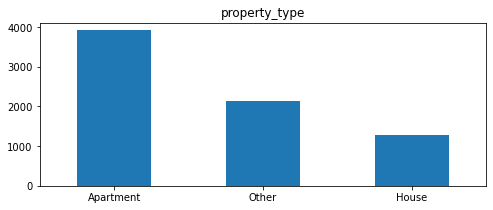

Apartment    0.532934
Other        0.291372
House        0.175694
Name: property_type, dtype: float64


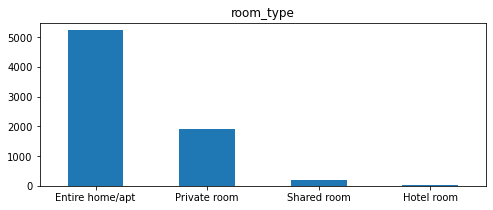

Entire home/apt    0.710670
Private room       0.258710
Shared room        0.025041
Hotel room         0.005580
Name: room_type, dtype: float64


In [86]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(8,3))
    print(df[col].value_counts(normalize=True))

### Reviews

Question: what is the distribution of reviews like?

Answer: for every review category, the majority of listings that have had a review have received a 10/10 rating for that category (or 95-100/100 overall) - clearly people love their Airbnbs. Ratings or 8 or below are rare. Guests seem to be most positive about communication, check-ins and accuracy. As noted previously, about a quarter of listings have not yet been reviewed.

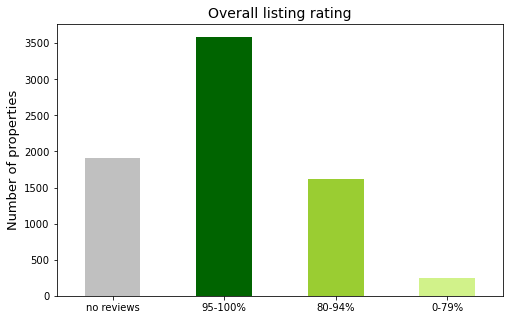

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
df['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

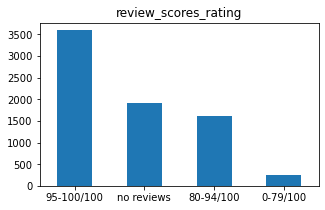

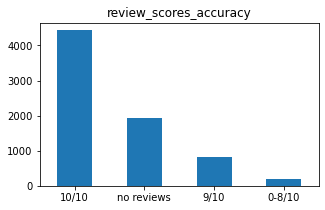

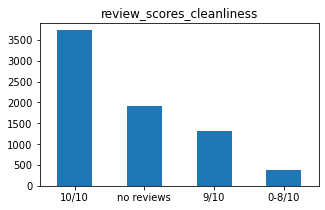

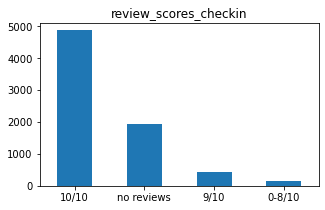

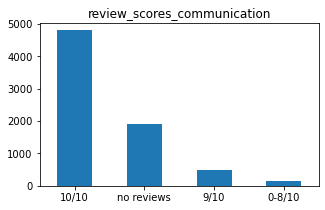

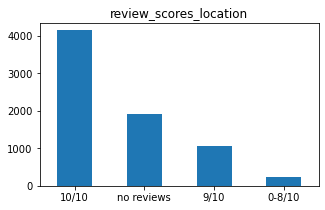

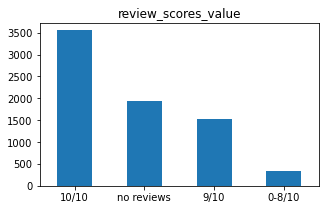

In [88]:
for col in list(df.columns[df.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

### First and last reviews

Question: how long have listings been on the site, and how many listings have been reviewed recently?

Answer: the most common time period in which currently live Airbnb listings had their first review is 2-3 years. This means that a lot of listings on the site have been active for at least a couple of years. Relatively few have been active for more than four years, however.

The most common category for the time since a listing received its last review is 1+year and 6-12 months. This means that a lot of listings have not been reviewed relatively recently. These inactive list could be due to the COVID19. 

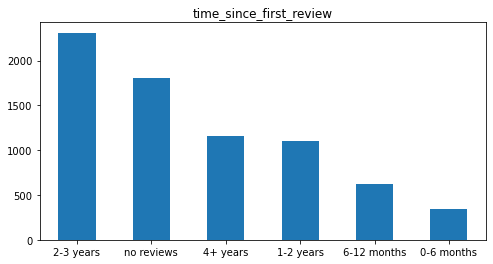

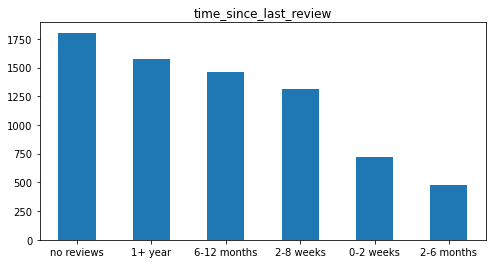

In [89]:
for col in ['time_since_first_review', 'time_since_last_review']:
    category_count_plot(col)

### Boolean (true or false) features

Many features (e.g. for amenities) can be true or false. This section compares the proportions of these features that are true or false (to explore the data and also to ascertain whether the feature is worth retaining), and the median price of each category (to explore the relationship between the category and price).

In [90]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

### Superhosts

Question: what proportion of Airbnb hosts are superhosts, and is it worth being one? (a question often asked by hosts)

Answer: about 38% of hosts are superhosts. However, it does not seem to improve the median price per night of their Airbnb listings, so it is arguable whether or not it is worth it (from a purely financial perspective).

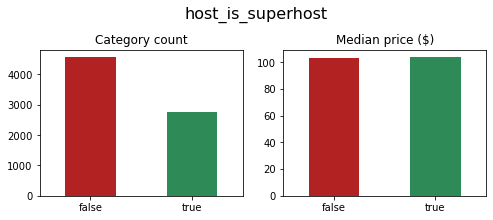

0    0.622754
1    0.377246
Name: host_is_superhost, dtype: float64


In [91]:
binary_count_and_price_plot('host_is_superhost')
print(df.host_is_superhost.value_counts(normalize=True))

### Host verification

Question: how many hosts are verified, and is it worth it? (a question often asked by hosts)

Answer: only about 79% of hosts are verified (e.g. by providing ID and verifying your phone number and email address), although it is something that hosts often think they are expected to do. Interestingly, however, despite the fact that one might expect the additional trust commanded by verified hosts to result in higher nightly prices, there is no discernable difference between the median nightly prices of listings with verified and unverified hosts. This column will be left in the dataframe, however, in case it has any useful interactions with other features.

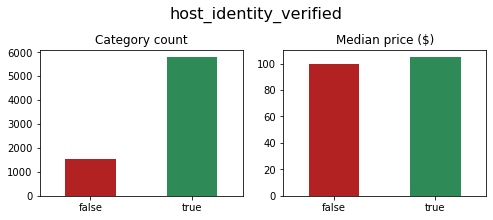

1    0.789058
0    0.210942
Name: host_identity_verified, dtype: float64


In [92]:
binary_count_and_price_plot('host_identity_verified')
print(df.host_identity_verified.value_counts(normalize=True))

### Instant booking

Question: how many properties are instant bookable (i.e. able to be booked without messaging the host first), and is it worth it?

Answer: only about 48% of properties are instant bookable. However, the added convenience increases the median price per night a little bit, but does not seem to have much effect.

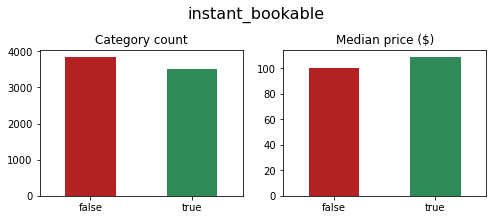

0    0.522863
1    0.477137
Name: instant_bookable, dtype: float64


In [93]:
binary_count_and_price_plot('instant_bookable')
print(df.instant_bookable.value_counts(normalize=True))

In [ ]:
## 14129 hosts
df[df['availability_30'] == 0]



In [101]:
len(df[df['availability_30'] == 0])

3638

In [102]:
len(df[df['availability_60'] == 0])

3245

In [98]:
len(df[df['availability_90'] == 0])

2894

In [100]:
len(df[df['availability_365'] == 0])

2386

### amenities

In [113]:
def cleanAmenities(df):
    df.loc[:, "amenities"] = df.amenities.replace(np.nan, '', regex=True)# fit_transform cannot handle missing values
    df.loc[:, "amenities"] = df.amenities.str.replace(" ", "_").str.replace("-", " ").str.replace("*", "") #split in two because of a python bug (https://stackoverflow.com/questions/3675144/regex-error-nothing-to-repeat)
    vectorizer = CountVectorizer(decode_error = "ignore") 
    X = vectorizer.fit_transform(df.amenities)
    bag_of_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
#    bag_of_words.hist(figsize=(20,20))
    return bag_of_words
#    return pd.concat([df.reset_index(drop=True).drop("amenities", axis = 1), bag_of_words], axis=1)

def cleanAmenities2(df):
    df.drop('n_play', axis=1, inplace=True)
    df.drop('pack_', axis=1, inplace=True)
    
    df.rename(columns={'translation_missing': 'translation_missing_en'}, inplace=True)
    df.drop('_en', axis=1, inplace=True)

    df.rename(columns={'kid_friendly': 'kid_friendly_family'}, inplace=True)
    df.drop('family', axis=1, inplace=True)

    df.rename(columns={'hour_check': '24_hour_check'}, inplace=True)
    df.drop('24', axis=1, inplace=True)

    df.rename(columns={'step': 'step_free_access'}, inplace=True)
    df.drop('free_access', axis=1, inplace=True)

    df.rename(columns={'lit_path_to_entrance': 'well_lit_path_to_entrance'}, inplace=True)
    df.drop('well', axis=1, inplace=True)

    df.rename(columns={'room': 'room_darkening_shades'}, inplace=True)
    df.drop('darkening_shades', axis=1, inplace=True)

    df.rename(columns={'wide_clearance_to_shower': 'wide_clearance_to_shower_toilet'}, inplace=True)
    df.drop('_toilet', axis=1, inplace=True)

    # washer_ is included in washer,  _dryer is already included in _dryer
    df.drop('washer_', axis=1, inplace=True)
    df.drop('_dryer', axis=1, inplace=True)
    return df

In [115]:
df_amenities = cleanAmenities(df)
#df_amenities = cleanAmenities2(df_amenities)
df = pd.concat([df_jan.reset_index(drop=True).drop("amenities", axis = 1), df_amenities], axis=1)

In [123]:
df_amenities.sum().sort_values(ascending=False).head(100)

wifi                          7146
heating                       7039
smoke_alarm                   7033
essentials                    7001
air_conditioning              6995
kitchen                       6616
hangers                       6258
tv                            6157
washer                        6011
dryer                         5991
iron                          5987
shampoo                       5959
carbon_monoxide_alarm         5800
hair_dryer                    5739
laptop_friendly_workspace     5472
fire_extinguisher             4741
hot_water                     4740
refrigerator                  4347
microwave                     4220
dishes_and_silverware         4108
coffee_maker                  3961
private_entrance              3591
stove                         3570
oven                          3563
bed_linens                    3478
cooking_basics                3396
first_aid_kit                 3184
free_street_parking           3022
dishwasher          

In [124]:
df_amenities.sum().sort_values(ascending=True).head(100)

free_wifi                        1
suitable_for_events              1
house_bikes                      1
smoking_allowed                  1
toiletries                       1
concierge                        1
beachfront                       1
ski_out                          1
bed_sheets_and_pillows           1
ski_in                           1
safe                             1
kitchenette                      4
record_player                    5
piano                            6
pets_allowed                     7
lake_access                      8
table_corner_guards             11
trash_compactor                 15
pour_over_coffee                15
nespresso_machine               21
sound_system                    21
waterfront                      28
baby_monitor                    29
rice_maker                      31
ev_charger                      36
mini_fridge                     41
beach_essentials                42
bread_maker                     43
laundromat_nearby   

In the list above, some amenities are more important than others (e.g. a balcony is more likely to increase price than a fax machine), and some are likely to be fairly uncommon (e.g. 'Electric profiling bed'). Based on previous experience working in the Airbnb property management industry, and research into which amenities are considered by guests to be more important, a selection of the more important amenities will be extracted. These will be further investigated in the EDA section. For example, if it turns out that almost all properties have/do not have a particular amenity, that feature will not be very useful in helping explain differences in prices.

The amenities chosen are (slashes indicate separate categories that can be combined):

* 24-hour check-in
* Air conditioning/central air conditioning
* Amazon Echo/Apple TV/DVD player/game console/Netflix/projector and screen/smart TV (i.e. non-basic electronics)
* BBQ grill/fire pit/propane barbeque
* Balcony/patio or balcony
* Beach view/beachfront/lake access/mountain view/ski-in ski-out/waterfront (i.e. great location/views)
* Bed linens
* Breakfast
* Cable TV/TV
* Coffee maker/espresso machine
* Cooking basics
* Dishwasher/Dryer/Washer/Washer and dryer
* Elevator
* Exercise equipment/gym/private gym/shared gym
* Family/kid friendly, or anything containing 'children'
* Free parking on premises/free street parking/outdoor parking/paid parking off premises/paid parking on premises
* Garden or backyard/outdoor seating/sun loungers/terrace
* Host greets you
* Hot tub/jetted tub/private hot tub/sauna/shared hot tub/pool/private pool/shared pool
* Internet/pocket wifi/wifi
* Long term stays allowed
* Pets allowed/cat(s)/dog(s)/pets live on this property/other pet(s)
* Private entrance
* Safe/security system
* Self check-in
* Smoking allowed
* Step-free access/wheelchair accessible, or anything containing 'accessible'
* Suitable for events

In [349]:
df.columns[40:]

Index(['bbq', 'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'outdoor_space', 'host_greeting',
       'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'smoking_allowed',
       'accessible', 'event_suitable'],
      dtype='object')